C:\Users\k-shimizu\AppData\Local\Temp\ipykernel_114476\4130304778.py:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file)
c:\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(249312,)
22050
[[-37.36962    -44.391502   -44.391502   ...  14.06273     11.047292
    0.28533036]
 [-35.276054   -44.391502   -44.391502   ...  21.951342    21.70247
   20.698397  ]
 [-33.616405   -34.10177    -35.305714   ...  23.233002    24.301754
   19.859188  ]
 ...
 [-44.391502   -44.391502   -44.391502   ... -44.391502   -44.391502
  -29.395878  ]
 [-44.391502   -44.391502   -44.391502   ... -44.391502   -44.391502
  -29.452782  ]
 [-44.391502   -44.391502   -44.391502   ... -44.391502   -44.391502
  -29.459059  ]]
(257, 1948)


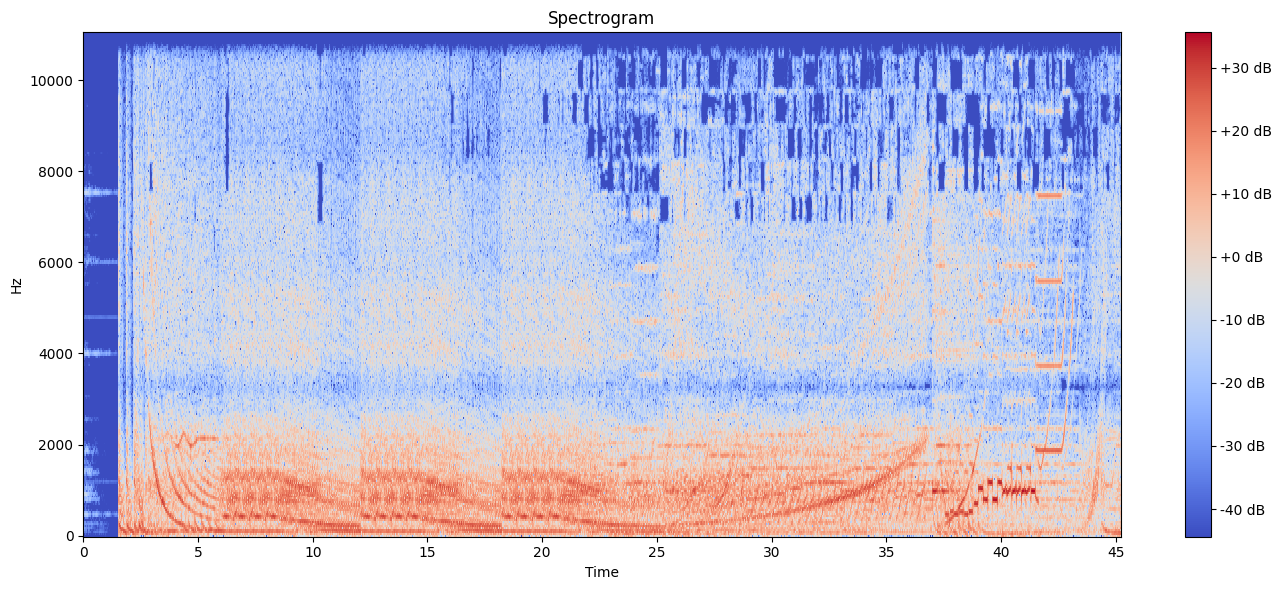

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 音声ファイルを読み込む
audio_file = '../data/10.mp4'
y, sr = librosa.load(audio_file)
print(y.shape)
print(sr)

# スペクトログラムを計算
X = librosa.stft(y, n_fft=512)
X_db = librosa.amplitude_to_db(abs(X))
print(X_db)
print(X_db.shape)

# スペクトログラムをプロット
plt.figure(figsize=(14, 6))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

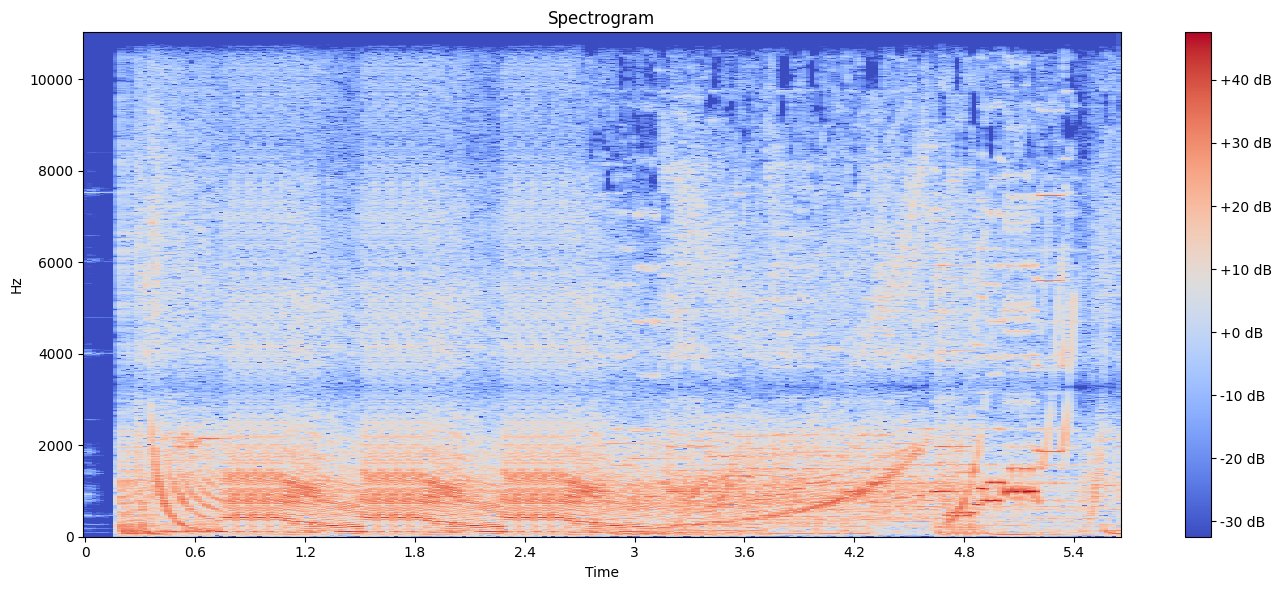

In [3]:
# スペクトログラムを計算
X = librosa.stft(y, n_fft=4092)
X_db = librosa.amplitude_to_db(abs(X))

# スペクトログラムをプロット
plt.figure(figsize=(14, 6))
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

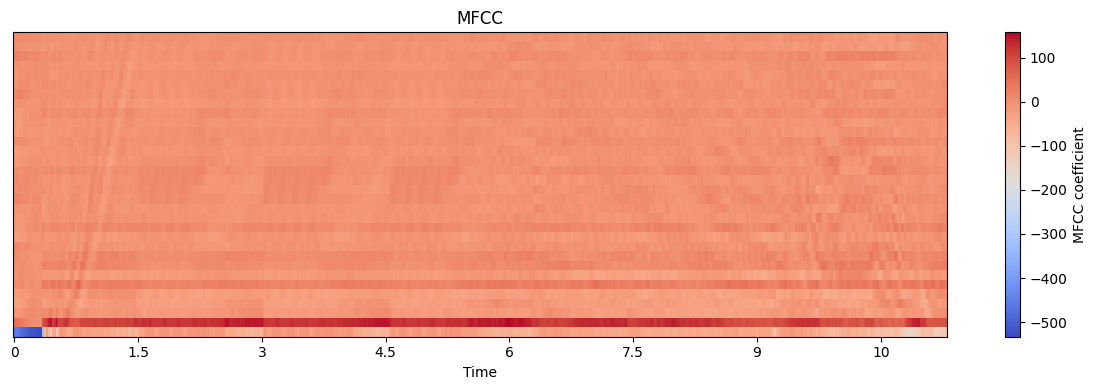

In [4]:
mfccs = librosa.feature.mfcc(y=y, n_mfcc=32)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(label='MFCC coefficient')
plt.title('MFCC')
plt.tight_layout()
plt.show()


339.2


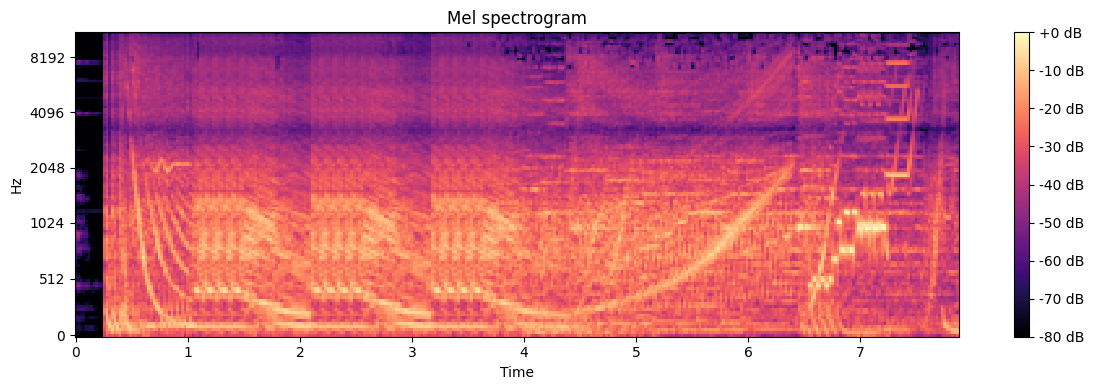

(128, 340)
[[-78.773056  -80.        -80.        ... -32.08209   -34.014324
  -27.313265 ]
 [-77.387314  -78.19555   -80.        ... -15.253445  -12.3478985
  -13.596464 ]
 [-72.09763   -70.49556   -71.78902   ... -12.031328  -12.897921
  -13.147627 ]
 ...
 [-80.        -80.        -80.        ... -54.137352  -55.313976
  -55.737713 ]
 [-80.        -80.        -80.        ... -57.165573  -55.966206
  -54.84728  ]
 [-80.        -80.        -80.        ... -70.40512   -72.153946
  -65.805145 ]]


In [34]:
import numpy as np
print(len(y) / sr * 30)
mel_spectrogram = librosa.feature.melspectrogram(y=y, n_fft=2048, hop_length=int(sr/30))
mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max) # デシベル単位に変換

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spectrogram_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()
print(mel_spectrogram.shape)
print(mel_spectrogram)